In [1]:
import pandas as pd
import multiprocessing as mp
import datetime
import time

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
datetime_format = "%Y-%m-%d %H:%M:%S"
now_dtm = datetime.datetime.today().strftime(datetime_format)
# dt = now_dtm.split(" ")[0].replace("-","")
dt = "20220210"

folder_csv = "./csv/"
csv_jongmok_list = folder_csv + f"jongmok_list_{dt}.csv"
csv_deal_history = folder_csv + f"multi_deal_history_{dt}.csv"

In [5]:
df_jongmok_list = pd.read_csv(csv_jongmok_list, encoding="utf-8-sig")
df_jongmok_list

,JONGMOK_CD,JONGMOK_NM,HHMI,SEC,DIFF,CPRICE,VOL
0,A122630,KODEX 레버리지,854,48,0,20780,0
1,A005930,삼성전자,854,51,0,74700,406
2,A000660,SK하이닉스,854,48,0,126000,0
3,A035420,NAVER,854,48,0,326000,0
4,A006400,삼성SDI,854,48,0,566000,0
5,A051910,LG화학,854,51,0,610000,12
6,A035720,카카오,854,51,0,86100,1
7,A005380,현대차,854,51,0,185000,9
8,A373220,LG에너지솔루션,854,51,0,511000,1616
9,A001440,대한전선,854,48,0,1570,0


In [8]:
df_deal_history = pd.read_csv(csv_deal_history, encoding="utf-8-sig")
df_deal_history.head(10)

,GBCD,JONGMOK_NM,TIMES,CPRICE,DIFF,CVOL,VOL
0,실시간(장중 체결),LG에너지솔루션,94016,489000,-22000,1,674519
1,실시간(장중 체결),LG에너지솔루션,94016,489000,-22000,1,674520
2,실시간(장중 체결),LG에너지솔루션,94016,489000,-22000,2,674522
3,실시간(장중 체결),우리금융지주,94016,15750,-100,2,960027
4,실시간(장중 체결),NAVER,94016,334500,8500,3,213610
5,실시간(장중 체결),LG에너지솔루션,94016,489000,-22000,1,674523
6,실시간(장중 체결),LG에너지솔루션,94016,489000,-22000,1,674524
7,실시간(장중 체결),NAVER,94016,334000,8000,1,213611
8,실시간(장중 체결),카카오,94016,88800,2700,1,1031406
9,실시간(장중 체결),LG에너지솔루션,94016,489000,-22000,50,674574


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

plt.style.use("seaborn-whitegrid")

C:\Users\JYCHOI\AppData\Local\Temp/ipykernel_11044/236749747.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


In [10]:
# 코덱스 데이터
df_kodex = df_deal_history[df_deal_history["JONGMOK_NM"] == "KODEX 레버리지"]
df_kodex.head()

,GBCD,JONGMOK_NM,TIMES,CPRICE,DIFF,CVOL,VOL
29,실시간(장중 체결),KODEX 레버리지,94016,21075,295,5,5740048
33,실시간(장중 체결),KODEX 레버리지,94017,21070,290,152,5740200
41,실시간(장중 체결),KODEX 레버리지,94017,21075,295,1,5740201
78,실시간(장중 체결),KODEX 레버리지,94018,21075,295,100,5740301
81,실시간(장중 체결),KODEX 레버리지,94018,21070,290,3000,5743301


In [11]:
df_kodex_diff = df_kodex.sort_values(["TIMES"], ascending=True)[["JONGMOK_NM", "TIMES", "CPRICE", "DIFF"]]
df_kodex_diff.head()

,JONGMOK_NM,TIMES,CPRICE,DIFF
29,KODEX 레버리지,94016,21075,295
33,KODEX 레버리지,94017,21070,290
41,KODEX 레버리지,94017,21075,295
78,KODEX 레버리지,94018,21075,295
81,KODEX 레버리지,94018,21070,290


<AxesSubplot:xlabel='TIMES'>

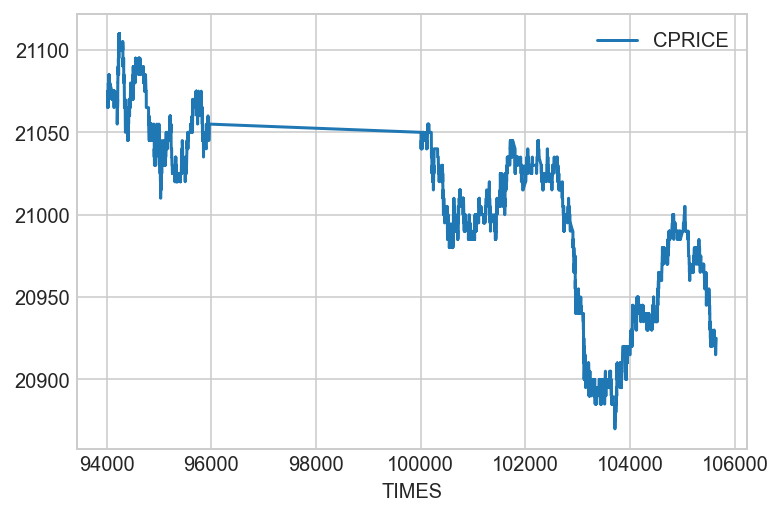

In [12]:
df_kodex_diff.plot(x="TIMES", y=["CPRICE"])

In [13]:
# 거래 기준을 가질 데이터
df_deal_source = df_deal_history[df_deal_history["JONGMOK_NM"] != "KODEX 레버리지"][["JONGMOK_NM", "TIMES", "CPRICE", "DIFF"]]
# df_deal_source = df_deal_history[["JONGMOK_NM", "TIMES", "CPRICE", "DIFF"]]
# df_deal_source.groupby(["JONGMOK_NM"]).plot(x="TIMES", y=["CPRICE"])
# df_deal = df_deal_source.pivot("JONGMOK_NM", "TIMES", "DIFF")
# df_deal.head()

In [14]:
def draw_jongmok_plot(nm):
    plt.rc("font", family = "Malgun Gothic")
    sns.set(
        font="Malgun Gothic", 
        rc={"axes.unicode_minus":False}, style='darkgrid'
    )

    if nm == "KODEX 레버리지":
        df_jongmok_plot = df_kodex_diff
    else:
        df_jongmok_plot = df_deal_source[df_deal_source.JONGMOK_NM == nm]
    p = df_jongmok_plot.plot(x="TIMES", y=["CPRICE"])
    p.set_title(nm)

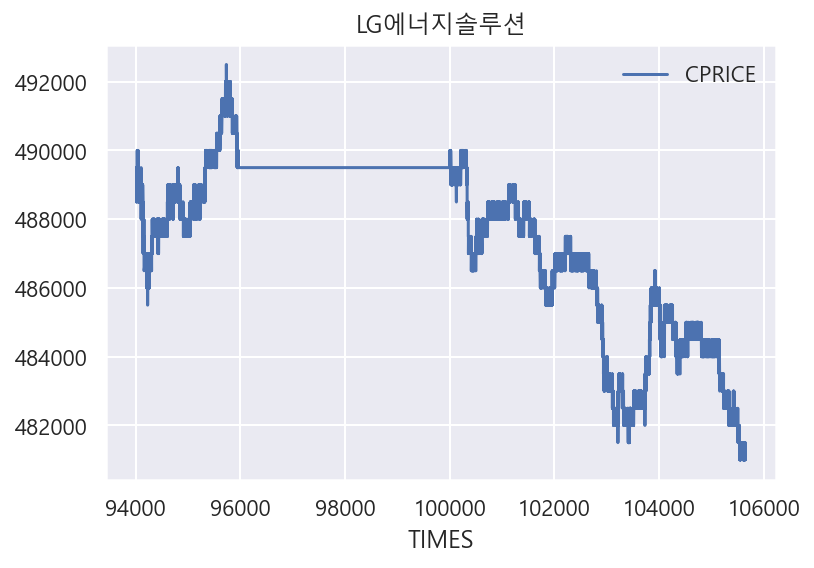

In [15]:
draw_jongmok_plot("LG에너지솔루션")

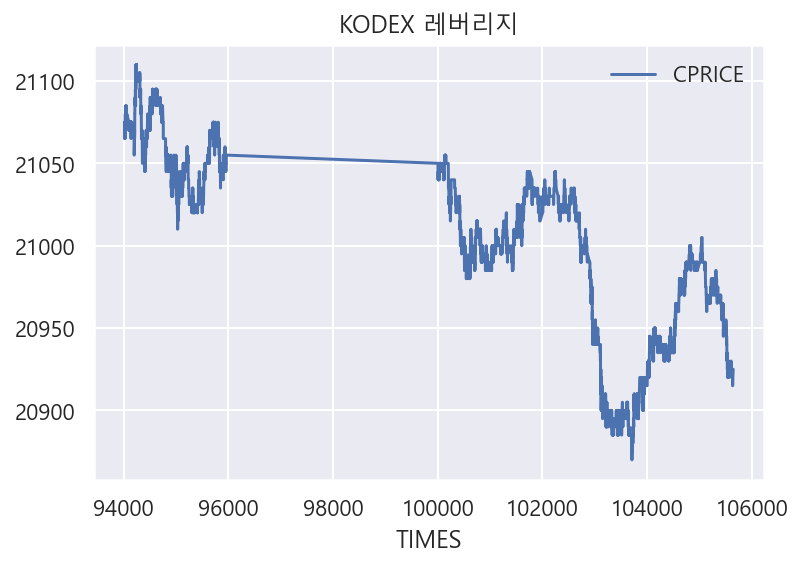

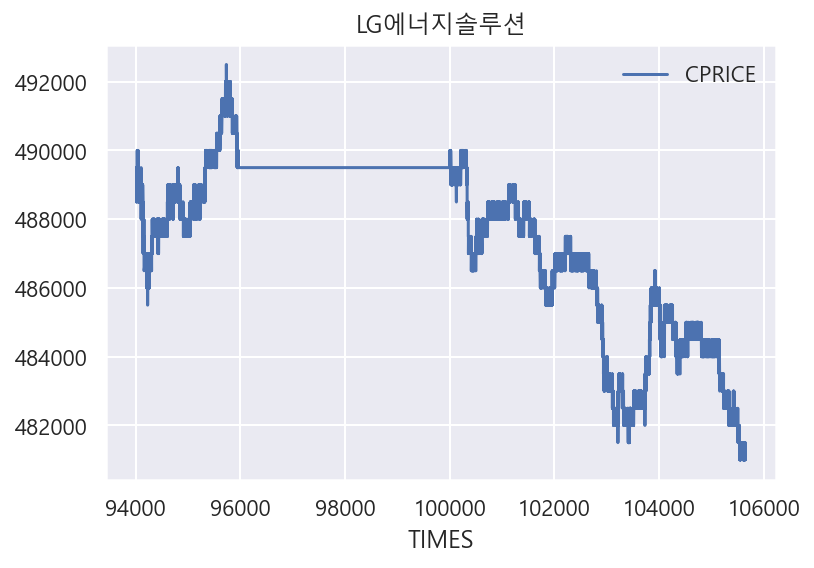

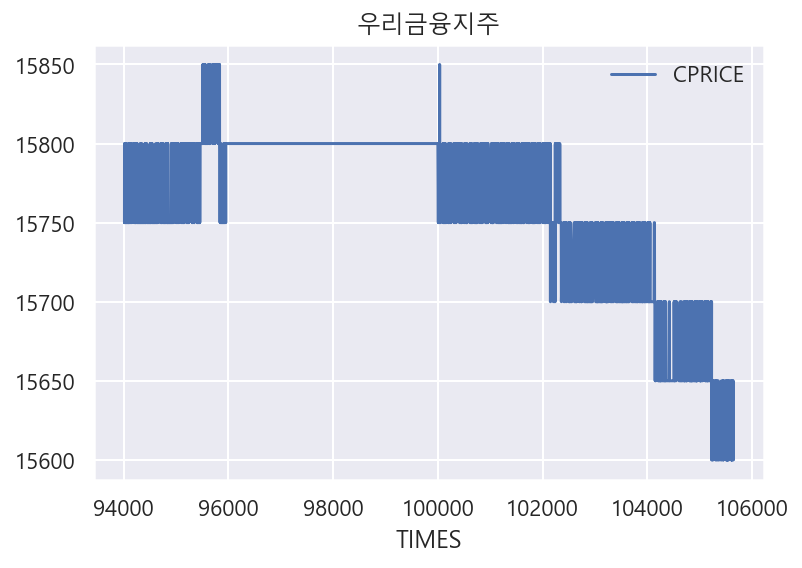

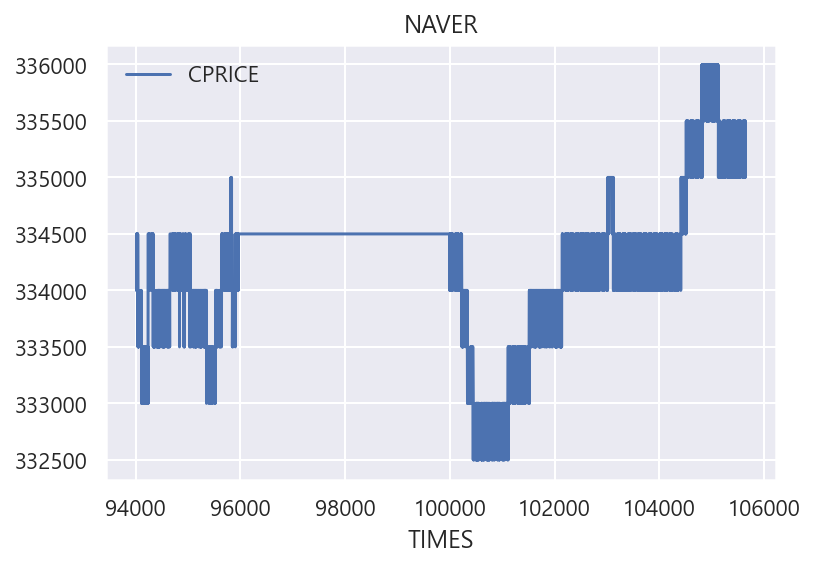

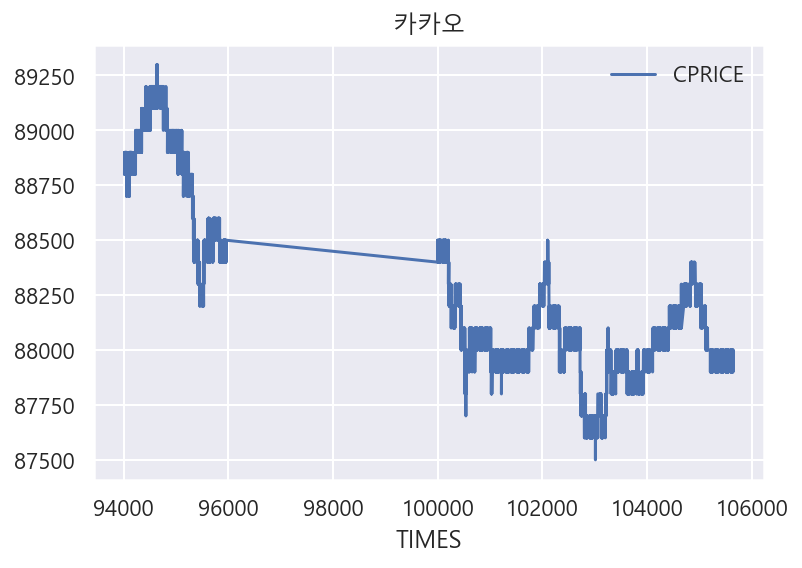

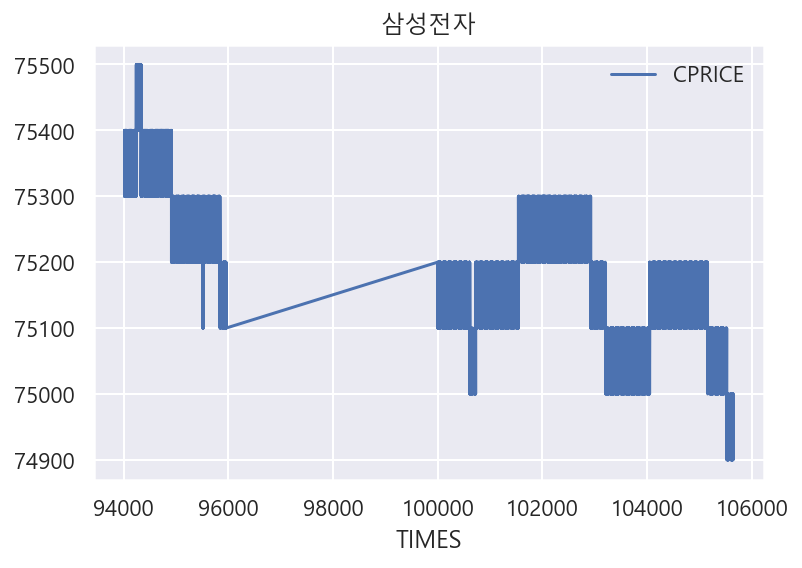

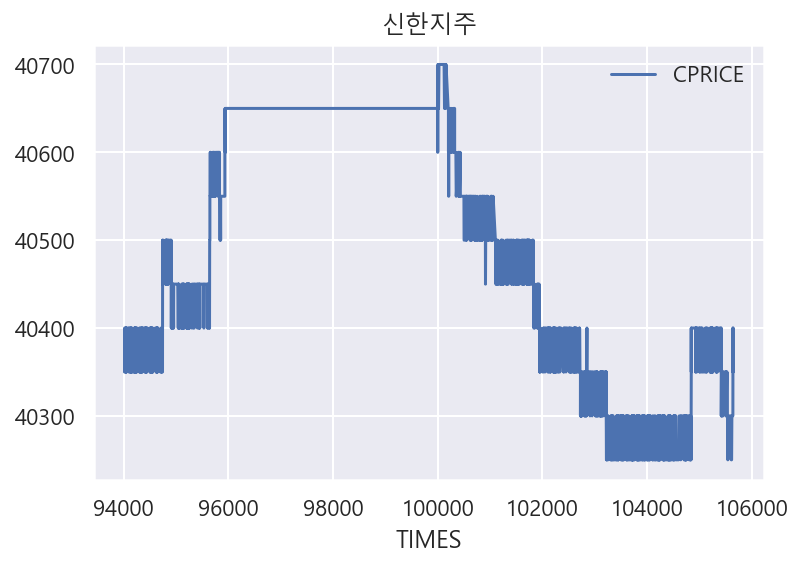

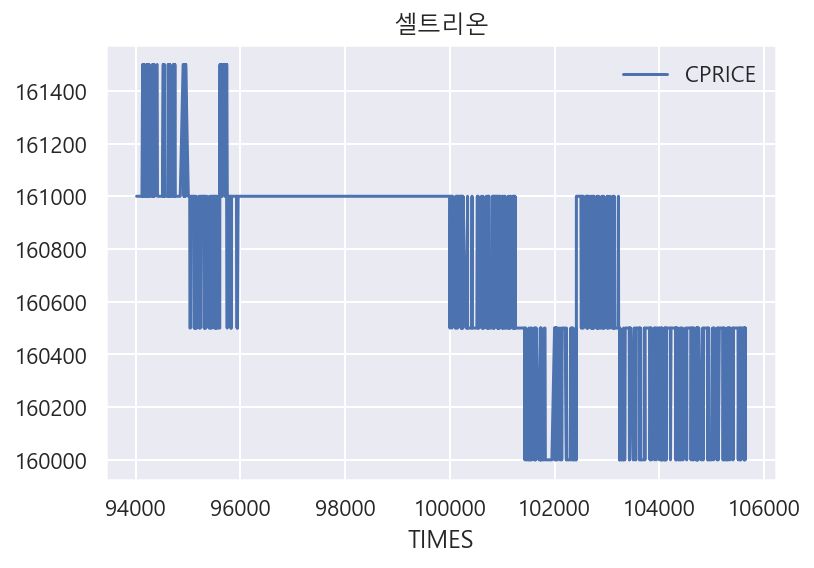

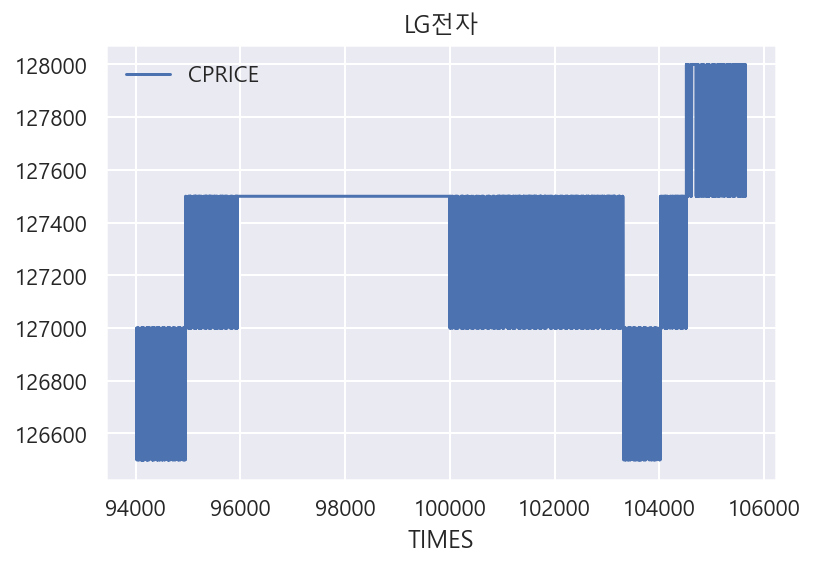

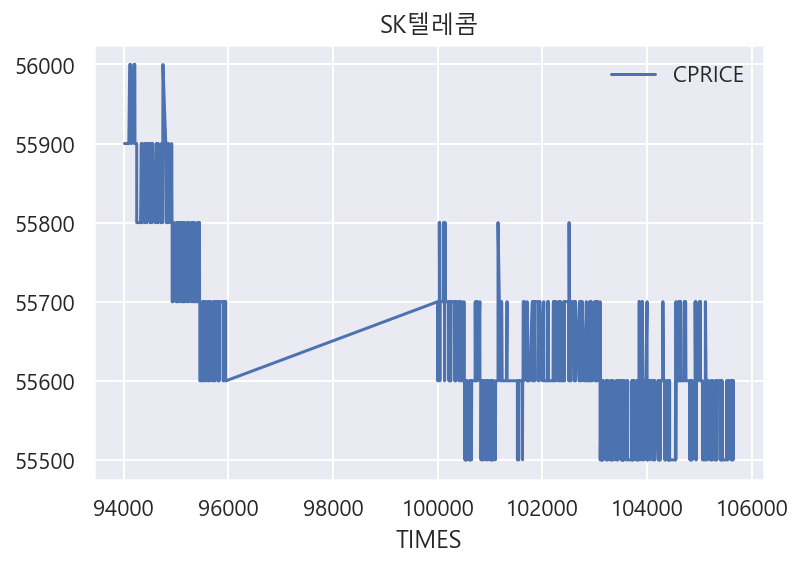

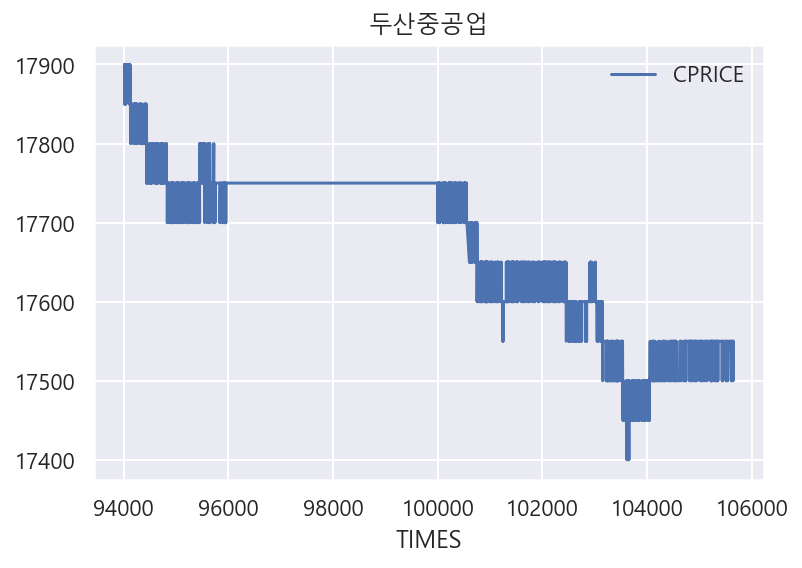

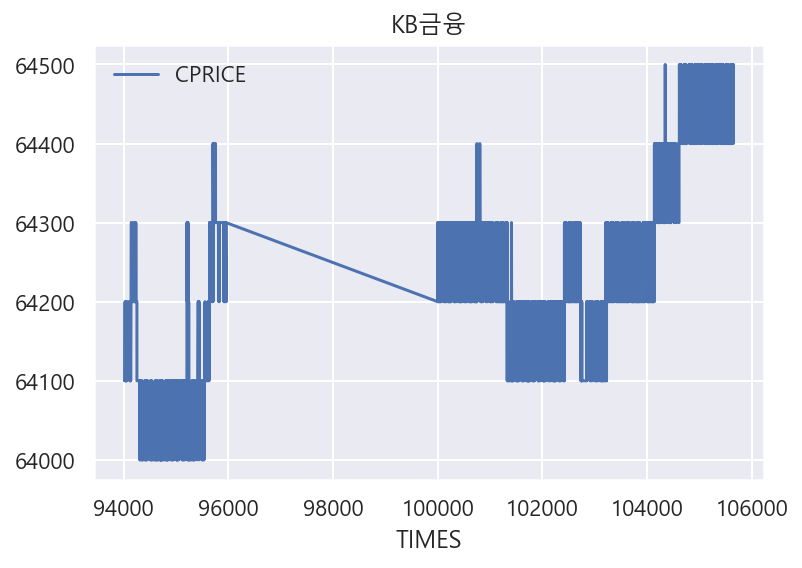

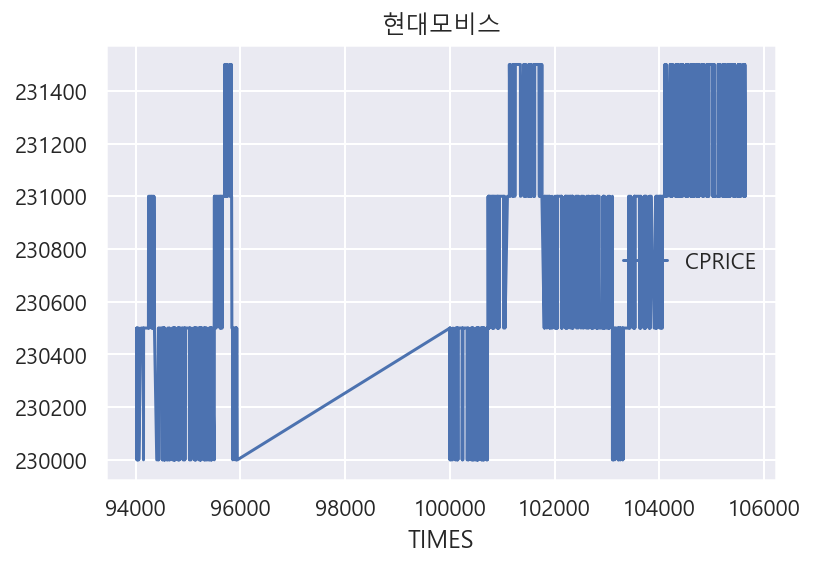

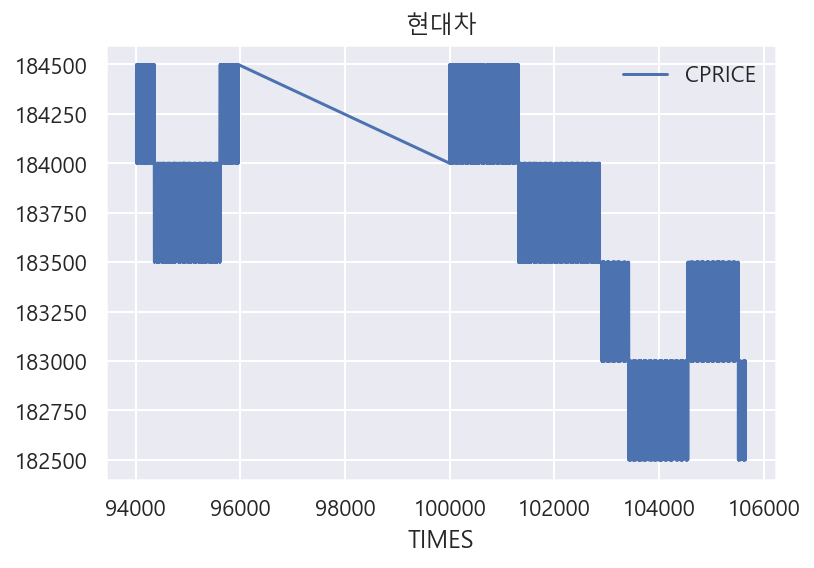

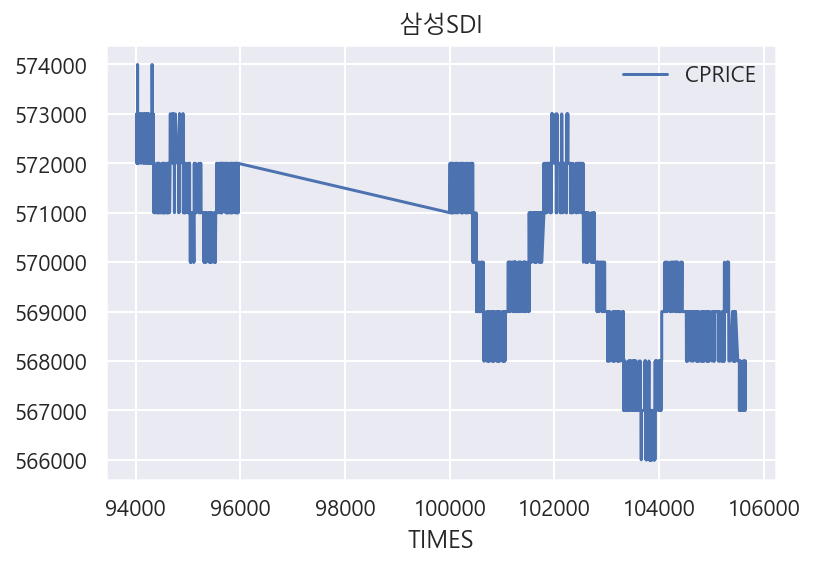

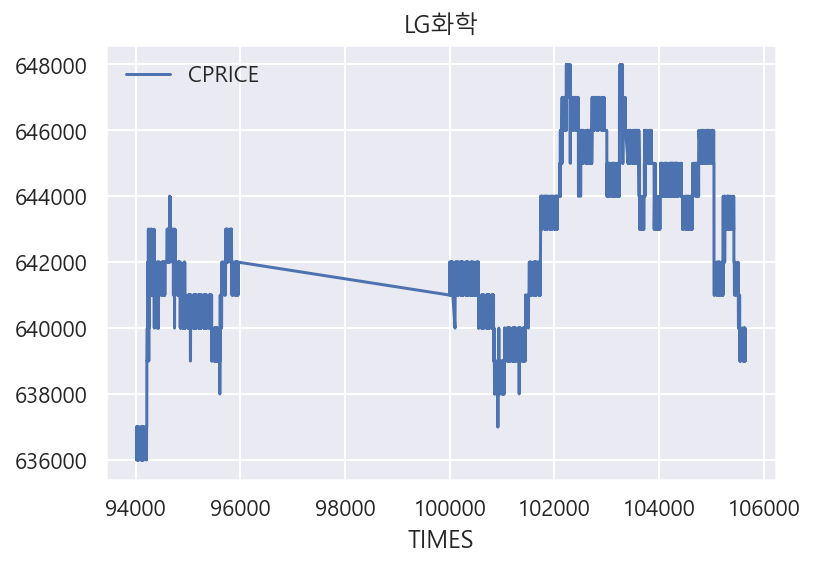

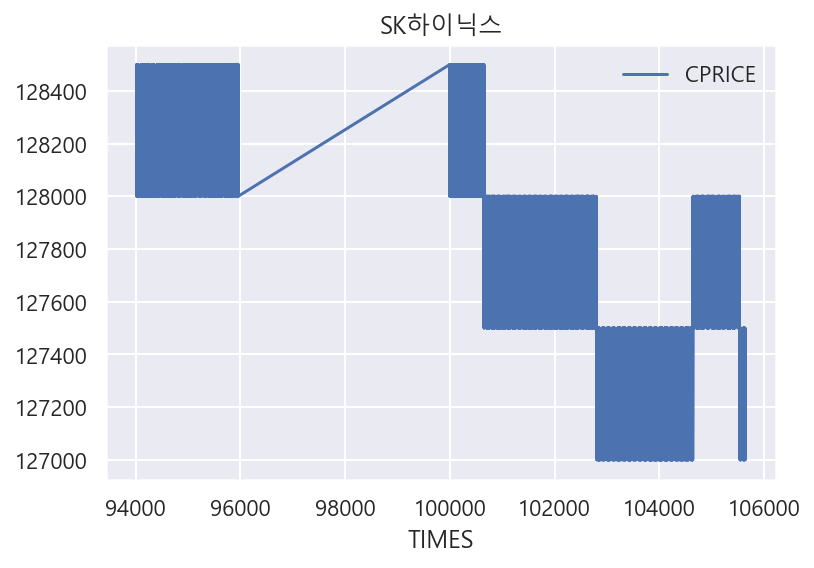

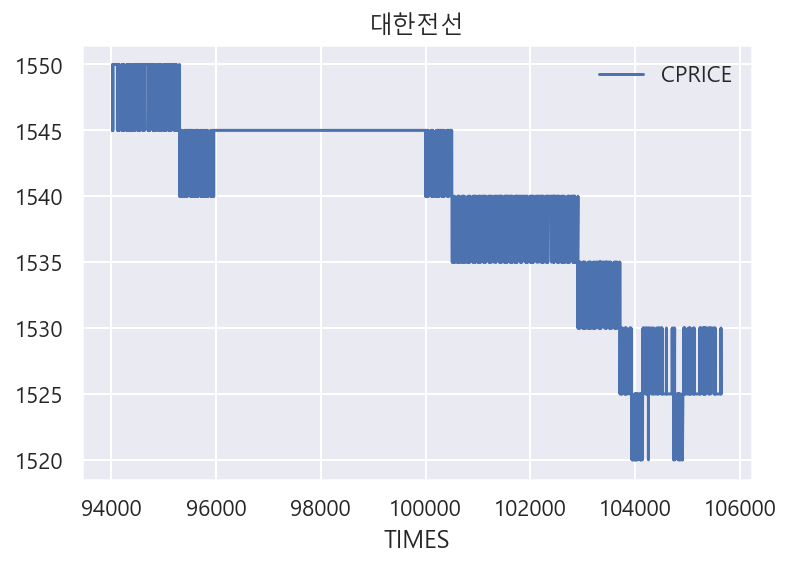

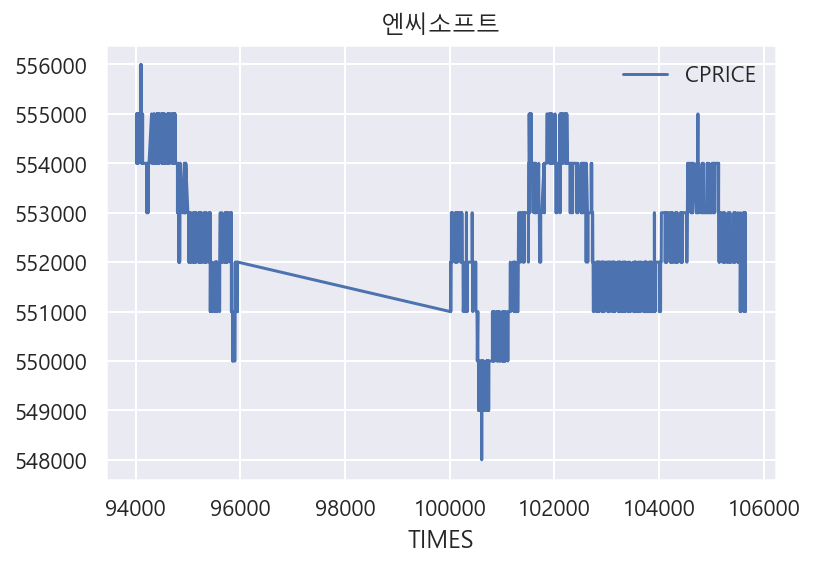

In [16]:
list_deal_jongmok = df_deal_source["JONGMOK_NM"].unique()

draw_jongmok_plot("KODEX 레버리지")

for nm in list_deal_jongmok:
    draw_jongmok_plot(nm)

In [111]:
df_deal_source.head()

,JONGMOK_NM,TIMES,CPRICE,DIFF
0,LG에너지솔루션,94016,489000,-22000
1,LG에너지솔루션,94016,489000,-22000
2,LG에너지솔루션,94016,489000,-22000
3,우리금융지주,94016,15750,-100
4,NAVER,94016,334500,8500


In [123]:
df_deal_source.head()

,JONGMOK_NM,TIMES,CPRICE,DIFF
0,LG에너지솔루션,94016,489000,-22000
1,LG에너지솔루션,94016,489000,-22000
2,LG에너지솔루션,94016,489000,-22000
3,우리금융지주,94016,15750,-100
4,NAVER,94016,334500,8500
